Integrantes:<br />
25990 - Hugo Sevilla Gómez Llanos <br />
23809 - Luis David Muñoz Acedo

---

# **Instalación**

In [ ]:
!pip install numpy pandas matplotlib seaborn cufflinks chart_studio --upgrade plotly

Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.18.4)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.3)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.2.1)
Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.10.1)
Requirement already up-to-date: cufflinks in /usr/local/lib/python3.6/dist-packages (0.17.3)
Requirement already up-to-date: chart_studio in /usr/local/lib/python3.6/dist-packages (1.1.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.8.0)


# **Importación**

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import io
import requests
%matplotlib inline

import plotly
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import json

from plotly.subplots import make_subplots

import cv2
from PIL import Image
import requests
from io import BytesIO

# **Leer DataFrames**

## URLs RAW de GitHub

URLS y DataFrames

In [ ]:
url_regiones = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv"
url_tendencia_nacional = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
url_provincias = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv"

df_regiones = pd.read_csv(url_regiones)
df_tendencia_nacional = pd.read_csv(url_tendencia_nacional)
df_provincias = pd.read_csv(url_provincias)

## Head and Info

Funcionarán saber los nombres de las columnas que renombramos del italiano al español. Y cambiar el formato de ciertos datos de ser necesario, cómo las fechas por ejemplo.

### Regiones

In [ ]:
print(df_regiones.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   data                        1995 non-null   object 
 1   stato                       1995 non-null   object 
 2   codice_regione              1995 non-null   int64  
 3   denominazione_regione       1995 non-null   object 
 4   lat                         1995 non-null   float64
 5   long                        1995 non-null   float64
 6   ricoverati_con_sintomi      1995 non-null   int64  
 7   terapia_intensiva           1995 non-null   int64  
 8   totale_ospedalizzati        1995 non-null   int64  
 9   isolamento_domiciliare      1995 non-null   int64  
 10  totale_positivi             1995 non-null   int64  
 11  variazione_totale_positivi  1995 non-null   int64  
 12  nuovi_positivi              1995 non-null   int64  
 13  dimessi_guariti             1995 

### Provincias

In [ ]:
print(df_provincias.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12160 entries, 0 to 12159
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   data                     12160 non-null  object 
 1   stato                    12160 non-null  object 
 2   codice_regione           12160 non-null  int64  
 3   denominazione_regione    12160 non-null  object 
 4   codice_provincia         12160 non-null  int64  
 5   denominazione_provincia  12160 non-null  object 
 6   sigla_provincia          10070 non-null  object 
 7   lat                      12160 non-null  float64
 8   long                     12160 non-null  float64
 9   totale_casi              12160 non-null  int64  
 10  note_it                  5 non-null      object 
 11  note_en                  5 non-null      object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.1+ MB
None


### Tendencia Nacional

In [ ]:
print(df_tendencia_nacional.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   data                        95 non-null     object 
 1   stato                       95 non-null     object 
 2   ricoverati_con_sintomi      95 non-null     int64  
 3   terapia_intensiva           95 non-null     int64  
 4   totale_ospedalizzati        95 non-null     int64  
 5   isolamento_domiciliare      95 non-null     int64  
 6   totale_positivi             95 non-null     int64  
 7   variazione_totale_positivi  95 non-null     int64  
 8   nuovi_positivi              95 non-null     int64  
 9   dimessi_guariti             95 non-null     int64  
 10  deceduti                    95 non-null     int64  
 11  totale_casi                 95 non-null     int64  
 12  tamponi                     95 non-null     int64  
 13  casi_testati                40 non-nu




---

# **Regiones | Pyplots & Plots**


---



## HEAD

In [ ]:
print(df_regiones.shape)

df_regiones.rename(columns={'data':'Fecha',
                            'stato':'Estado',
                            'codice_regione': 'Codigo_Regional',
                            'denominazione_regione': 'Denominacion_Regional',
                            'lat':'Latitud',
                            'long':'Longitud',
                            'ricoverati_con_sintomi':'Hospitalizados_con_Sintomas',
                            'terapia_intensiva':'Terapia_Intensiva',
                            'totale_ospedalizzati':'Total_de_Hospitalizados',
                            'isolamento_domiciliare':'Aislados_en_Hogar',
                            'totale_positivi':'Total_de_Positivos',
                            'variazione_totale_positivi':'Variacion_Positiva_Total',
                            'nuovi_positivi':'Nuevos_Positivos',
                            'dimessi_guariti':'Recuperados',
                            'deceduti':'Fallecidos',
                            'totale_casi':'Casos_Totales',
                            'tamponi':'Cotonetes',
                            'casi_testati':'Casos_Probados',
                            'note_it':'Notas_1',
                            'note_en':'Notas_2'
                            },
                   inplace=True)

df_regiones.Fecha = pd.to_datetime(df_regiones.Fecha)
df_regiones.head(5)

(1995, 20)


,Fecha,Estado,Codigo_Regional,Denominacion_Regional,Latitud,Longitud,Hospitalizados_con_Sintomas,Terapia_Intensiva,Total_de_Hospitalizados,Aislados_en_Hogar,Total_de_Positivos,Variacion_Positiva_Total,Nuevos_Positivos,Recuperados,Fallecidos,Casos_Totales,Cotonetes,Casos_Probados,Notas_1,Notas_2
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,NaN,NaN
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2020-02-24 18:00:00,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN
3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN
4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,NaN,NaN


## Regiones Únicas

In [ ]:
regiones = np.unique(df_regiones['Denominacion_Regional'].values)
print(regiones,'\n')
print('cantidad de regiones:',regiones.shape[0])

['Abruzzo' 'Basilicata' 'Calabria' 'Campania' 'Emilia-Romagna'
 'Friuli Venezia Giulia' 'Lazio' 'Liguria' 'Lombardia' 'Marche' 'Molise'
 'P.A. Bolzano' 'P.A. Trento' 'Piemonte' 'Puglia' 'Sardegna' 'Sicilia'
 'Toscana' 'Umbria' "Valle d'Aosta" 'Veneto'] 

cantidad de regiones: 21


## Formato de Fecha y Datos principales

In [ ]:
df_regiones.head(0)

,Fecha,Estado,Codigo_Regional,Denominacion_Regional,Latitud,Longitud,Hospitalizados_con_Sintomas,Terapia_Intensiva,Total_de_Hospitalizados,Aislados_en_Hogar,Total_de_Positivos,Variacion_Positiva_Total,Nuevos_Positivos,Recuperados,Fallecidos,Casos_Totales,Cotonetes,Casos_Probados,Notas_1,Notas_2


In [ ]:
Region_Fecha = df_regiones[['Fecha','Denominacion_Regional','Total_de_Positivos', 'Recuperados', 'Fallecidos']]
Region_Fecha = df_regiones[['Fecha','Denominacion_Regional','Total_de_Positivos', 'Recuperados', 'Fallecidos', 'Casos_Totales', 'Hospitalizados_con_Sintomas', 'Terapia_Intensiva', 'Total_de_Hospitalizados', 'Aislados_en_Hogar', 'Total_de_Positivos', 'Variacion_Positiva_Total', 'Nuevos_Positivos', 'Cotonetes', 'Casos_Probados']]
Region_Fecha

,Fecha,Denominacion_Regional,Total_de_Positivos,Recuperados,Fallecidos,Casos_Totales,Hospitalizados_con_Sintomas,Terapia_Intensiva,Total_de_Hospitalizados,Aislados_en_Hogar,Total_de_Positivos,Variacion_Positiva_Total,Nuevos_Positivos,Cotonetes,Casos_Probados
0,2020-02-24 18:00:00,Abruzzo,0,0,0,0,0,0,0,0,0,0,0,5,NaN
1,2020-02-24 18:00:00,Basilicata,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,2020-02-24 18:00:00,P.A. Bolzano,0,0,0,0,0,0,0,0,0,0,0,1,NaN
3,2020-02-24 18:00:00,Calabria,0,0,0,0,0,0,0,0,0,0,0,1,NaN
4,2020-02-24 18:00:00,Campania,0,0,0,0,0,0,0,0,0,0,0,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,2020-05-28 17:00:00,Toscana,1380,7677,1029,10086,126,27,153,1227,1380,-80,4,242687,173406.0
1991,2020-05-28 17:00:00,P.A. Trento,458,3505,462,4425,17,3,20,438,458,-19,3,83018,46735.0
1992,2020-05-28 17:00:00,Umbria,33,1323,75,1431,14,2,16,17,33,1,0,67458,47920.0
1993,2020-05-28 17:00:00,Valle d'Aosta,23,1016,143,1182,16,0,16,7,23,-4,1,14653,11487.0


## Primeras gráficas en razón de tiempo
### Las aplicamos para visualizar y analizar; Total de Positivos (Casos Confirmados), Número de Fallecidos y de Personas Recuperadas

In [ ]:
def RegionesGraph(columna):
  
  val = 21

  fig = make_subplots(rows=1, cols=1)

  for i in range(val):

    df_temp = Region_Fecha[Region_Fecha['Denominacion_Regional'] == regiones[i]]

    y = df_temp.loc[ : , columna ]

    fig.add_trace(
        go.Scatter(x=df_temp.Fecha, y=y, name = regiones[i]),
        row=1, col=1
    )

  fig.update_layout( title_text=columna)
  fig.show()

RegionesGraph('Fallecidos')
RegionesGraph('Recuperados')
RegionesGraph('Casos_Totales')
RegionesGraph('Hospitalizados_con_Sintomas')
RegionesGraph('Terapia_Intensiva')
RegionesGraph('Total_de_Hospitalizados')
RegionesGraph('Aislados_en_Hogar')
RegionesGraph('Variacion_Positiva_Total')
RegionesGraph('Nuevos_Positivos')
RegionesGraph('Cotonetes')
RegionesGraph('Casos_Probados')

## Ordenar por Región


In [ ]:
datos_por_region = df_regiones.groupby(['Denominacion_Regional'])[['Casos_Totales','Hospitalizados_con_Sintomas', 'Total_de_Hospitalizados', 'Terapia_Intensiva', 'Aislados_en_Hogar', 'Total_de_Positivos', 'Nuevos_Positivos', 'Recuperados', 'Fallecidos']].sum()
datos_por_region.sort_values(by='Casos_Totales',ascending=False)
datos_por_region.reset_index(inplace=True)
datos_por_region

,Denominacion_Regional,Casos_Totales,Hospitalizados_con_Sintomas,Total_de_Hospitalizados,Terapia_Intensiva,Aislados_en_Hogar,Total_de_Positivos,Nuevos_Positivos,Recuperados,Fallecidos
0,Abruzzo,169114,19790,22364,2574,83041,105405,3237,45617,18092
1,Basilicata,22374,2836,3396,560,8873,12269,399,8758,1347
2,Calabria,66259,7688,8355,667,33655,42010,1158,19405,4844
3,Campania,260341,32740,37109,4369,116739,153848,4777,86422,20071
4,Emilia-Romagna,1543056,183321,201949,18628,496690,698639,27701,636363,208054
5,Friuli Venezia Giulia,181568,10434,12161,1727,61069,73230,3262,92164,16174
6,Lazio,388170,85881,95200,9319,161074,256274,7692,104423,27473
7,Liguria,464418,53199,60383,7184,137347,197730,9605,200762,65926
8,Lombardia,4739193,643029,707600,64571,1444300,2151900,88177,1752869,834424
9,Marche,392359,47142,53952,6810,160640,214592,6719,124419,53348


## Pairplot

### Columnas

In [ ]:
columnas = list(datos_por_region.iloc[0:1,:])
columnas

['Denominacion_Regional',
 'Casos_Totales',
 'Hospitalizados_con_Sintomas',
 'Total_de_Hospitalizados',
 'Terapia_Intensiva',
 'Aislados_en_Hogar',
 'Total_de_Positivos',
 'Nuevos_Positivos',
 'Recuperados',
 'Fallecidos']

## Gráficos de Barras

### Casos Totales y Conparaciones por Región

In [ ]:
def RegionesBar(columna):
  
  val = 21

  fig = make_subplots(rows=1, cols=1)

  for i in range(val):

    df_temp = Region_Fecha[Region_Fecha['Denominacion_Regional'] == regiones[i]]

    y = df_temp.loc[ : , columna ]

    fig.add_trace(
        go.Bar(x=df_temp.Fecha, y=y, name = regiones[i]),
        row=1, col=1
    )

  fig.update_layout( title_text=columna)
  fig.show()

RegionesBar('Fallecidos')
RegionesBar('Recuperados')
RegionesBar('Casos_Totales')
RegionesBar('Hospitalizados_con_Sintomas')
RegionesBar('Terapia_Intensiva')
RegionesBar('Total_de_Hospitalizados')
RegionesBar('Aislados_en_Hogar')
RegionesBar('Variacion_Positiva_Total')
RegionesBar('Nuevos_Positivos')
RegionesBar('Cotonetes')
RegionesBar('Casos_Probados')

In [ ]:
print(datos_por_region[['Recuperados', 'Fallecidos']].sum())

Recuperados    4654111
Fallecidos     1634434
dtype: int64


## Caja y Bigotes Región

In [ ]:
fig = px.box(df_regiones, x='Denominacion_Regional', y="Casos_Totales")
fig.show()



---

# **Provincias | Caja y Bigotes & Choropleth Map**
## + 1 Dato de Región
---

## Renombrar Columnas

In [ ]:
print(df_provincias.shape)

df_provincias.rename(columns={'data':'Fecha',
                            'stato':'Estado',
                            'codice_regione': 'Codigo_Regional',
                            'denominazione_regione': 'Denominacion_Regional',
                            'codice_provincia':'Codigo_Provincial',
                            'denominazione_provincia':'Provincia',
                            'sigla_provincia':'Abreviacion_de_la_Provincia',
                            'lat':'Latitud',
                            'long':'Longitud',                            
                            'totale_casi':'Casos_Totales',
                            'note_it':'Notas_1',
                            'note_en':'Notas_2'
                            },
                   inplace=True)

df_provincias[df_provincias['Denominacion_Regional'] == 'Chieti']
#

(12160, 12)


,Fecha,Estado,Codigo_Regional,Denominacion_Regional,Codigo_Provincial,Provincia,Abreviacion_de_la_Provincia,Latitud,Longitud,Casos_Totales,Notas_1,Notas_2


## Caja y Bigotes para Provincias y Regiones (Estados y Municipios)

In [ ]:
fig = px.box(df_provincias, x='Provincia', y="Casos_Totales")
fig.show()

## Choropleth Map

#### Generar Nuevo Dataframe y Limpiarlo

In [ ]:
df_provincias_choropleth_map = df_provincias.copy()
print('columnas:\n',df_provincias_choropleth_map.columns, '\nShape:',df_provincias_choropleth_map.shape,'\n')

# Deshacernos de columnas que no utilizaremos
df_provincias_choropleth_map.drop(columns=['Estado', 'Codigo_Regional','Denominacion_Regional', 'Codigo_Provincial', 'Abreviacion_de_la_Provincia', 'Latitud', 'Longitud', 'Notas_1', 'Notas_2' ],axis=2,inplace=True)

# Deshacernos de las filas que no utilizaremos
df_provincias_choropleth_map = df_provincias_choropleth_map[df_provincias_choropleth_map['Provincia'] != 'In fase di definizione/aggiornamento']

# Cambiar formato de Fechas
df_provincias_choropleth_map['Fecha'] = pd.to_datetime(df_provincias_choropleth_map['Fecha'], format="%Y-%m-%d")
df_provincias_choropleth_map['Fecha'] = df_provincias_choropleth_map['Fecha'].dt.strftime('%Y-%m-%d')

print('Después de eliminar columnas, filas con Provincia sin Definir/Actualizar y cambiar formato de fechas:\nShape:',df_provincias_choropleth_map.shape)

df_provincias_choropleth_map.head()

columnas:
 Index(['Fecha', 'Estado', 'Codigo_Regional', 'Denominacion_Regional',
       'Codigo_Provincial', 'Provincia', 'Abreviacion_de_la_Provincia',
       'Latitud', 'Longitud', 'Casos_Totales', 'Notas_1', 'Notas_2'],
      dtype='object') 
Shape: (12160, 12) 

Después de eliminar columnas, filas con Provincia sin Definir/Actualizar y cambiar formato de fechas:
Shape: (10165, 3)


,Fecha,Provincia,Casos_Totales
0,2020-02-24,Chieti,0
1,2020-02-24,L'Aquila,0
2,2020-02-24,Pescara,0
3,2020-02-24,Teramo,0
5,2020-02-24,Matera,0


### Generar Mapa

In [ ]:
# Generar Choropleth

fig = px.choropleth(df_provincias_choropleth_map,
                    geojson='https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_provinces.geojson',
                    locations='Provincia', color='Casos_Totales',
                    color_continuous_scale='Greens', featureidkey='properties.prov_name',
                    animation_frame='Fecha', range_color=(0, max(df_provincias_choropleth_map['Casos_Totales'])))
fig.update_geos(projection_type="orthographic", fitbounds="locations", 
                showcoastlines=True, coastlinecolor="black",
                showland=True, landcolor="#e0b385",
                showocean=True, oceancolor="LightBlue",
                showlakes=True, lakecolor="Blue",
                showrivers=True, rivercolor="Blue")

fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()



---


# **Tendencia Nacional**
## (Acumulativo/Frecuencial)


---



## Importación de repuesto

In [ ]:
url_tendencia_nacional = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df_tendencia_nacional = pd.read_csv(url_tendencia_nacional)

## Cambio de nombre de Columnas

In [ ]:
df_tendencia_nacional.rename(columns={'data':'Fecha',
                            'stato':'Estado',
                            'ricoverati_con_sintomi':'Hospitalizado_con_Sintomas',
                            'terapia_intensiva':'Terapia_Intensiva',
                            'totale_ospedalizzati':'Total_de_Hospitalizados',
                            'isolamento_domiciliare':'Aislados_en_Hogar',
                            'totale_positivi':'Total_de_Positivos',
                            'variazione_totale_positivi':'Variacion_Positiva_Total',
                            'nuovi_positivi':'Nuevos_Positivos',
                            'dimessi_guariti':'Recuperados',
                            'deceduti':'Fallecidos',
                            'totale_casi':'Casos_Totales',
                            'tamponi':'Cotonetes',
                            'casi_testati':'Casos_Probados',
                            'note_it':'Notas_1',
                            'note_en':'Notas_2'
                            },
                   inplace=True)

print(df_tendencia_nacional.shape)
df_tendencia_nacional.head(5)

(95, 16)


,Fecha,Estado,Hospitalizado_con_Sintomas,Terapia_Intensiva,Total_de_Hospitalizados,Aislados_en_Hogar,Total_de_Positivos,Variacion_Positiva_Total,Nuevos_Positivos,Recuperados,Fallecidos,Casos_Totales,Cotonetes,Casos_Probados,Notas_1,Notas_2
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN,NaN


## Gráficas de la Nación

### Función


In [ ]:
def Final(todo = 'si'):
  fig = make_subplots(rows=1, cols=1)
  fig.add_trace(
          go.Scatter(x=df_tendencia_nacional.Fecha, y=df_tendencia_nacional.Hospitalizado_con_Sintomas, name = 'Hospitalizados con Sintomas'),
          row=1, col=1
      )
  fig.add_trace(
          go.Scatter(x=df_tendencia_nacional.Fecha, y=df_tendencia_nacional.Terapia_Intensiva, name = 'Terapia Intensiva'),
          row=1, col=1
      )
  fig.add_trace(
          go.Scatter(x=df_tendencia_nacional.Fecha, y=df_tendencia_nacional.Total_de_Hospitalizados, name = 'Total de Hospitalizados'),
          row=1, col=1
      )
  fig.add_trace(
          go.Scatter(x=df_tendencia_nacional.Fecha, y=df_tendencia_nacional.Aislados_en_Hogar, name = 'Aislados en Hogar'),
          row=1, col=1
      )
  fig.add_trace(
          go.Scatter(x=df_tendencia_nacional.Fecha, y=df_tendencia_nacional.Total_de_Positivos, name = 'Total de Positivos'),
          row=1, col=1
      )
  fig.add_trace(
          go.Scatter(x=df_tendencia_nacional.Fecha, y=df_tendencia_nacional.Variacion_Positiva_Total, name = 'Variacion Positiva Total'),
          row=1, col=1
      )
  fig.add_trace(
          go.Scatter(x=df_tendencia_nacional.Fecha, y=df_tendencia_nacional.Nuevos_Positivos, name = 'Nuevos Positivos'),
          row=1, col=1
      )
  fig.add_trace(
          go.Scatter(x=df_tendencia_nacional.Fecha, y=df_tendencia_nacional.Recuperados, name = 'Recuperados'),
          row=1, col=1
      )
  fig.add_trace(
          go.Scatter(x=df_tendencia_nacional.Fecha, y=df_tendencia_nacional.Fallecidos, name = 'Fallecidos'),
          row=1, col=1
      )
  fig.add_trace(
          go.Scatter(x=df_tendencia_nacional.Fecha, y=df_tendencia_nacional.Casos_Totales, name = 'Casos Totales'),
          row=1, col=1
      )
  if(todo == 'si'):
      fig.add_trace(
              go.Scatter(x=df_tendencia_nacional.Fecha, y=df_tendencia_nacional.Cotonetes, name = 'Cotonetes'),
              row=1, col=1
          )
      fig.add_trace(
              go.Scatter(x=df_tendencia_nacional.Fecha, y=df_tendencia_nacional.Casos_Probados, name = 'Casos Probados'),
              row=1, col=1
          )
  fig.update_layout( title_text='TOTALES (Acumulativos/Frecuenciales')
  fig.show()

### Impresión

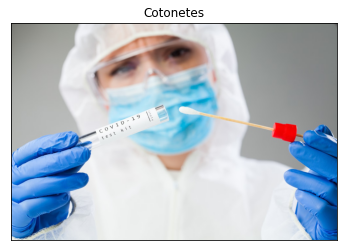

In [ ]:
Final(todo = 'no')

response = requests.get('https://www.focus.it/images/2020/04/14/covid-19-tamponi-di-nuovo-positivi-orig.jpg')
img = Image.open(BytesIO(response.content))
plt.figure()
plt.xticks([]), plt.yticks([]) # esconde números de X y Y
plt.title('Cotonetes')
plt.imshow(img)
plt.show()  # display i

Final(todo = 'si')

# **Referencias y Bibliografía**

---


* [Repositorio de Github de Italia](https://github.com/pcm-dpc/COVID-19?files=1)

* [Artículo de Referencia sobre en Análisis para la pandemia de Covid](https://medium.com/@romanorac/pandas-analysis-of-coronavirus-pandemic-2b0d784e0806)

* [Artículo para generar Choropleth Maps](https://medium.com/polimi-data-scientists/how-to-visualize-the-spread-of-covid-19-in-italy-6d9ddea18a02)

* [Profundización en Choropleth Maps](https://plotly.com/python/map-configuration/)


* [GeoJson de Italia](https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_provinces.geojson)


---


**Links de Italia**



*   https://www.sciencedirect.com/science/article/

*   https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data
*   https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/KDFYZW
*   https://github.com/pcm-dpc/COVID-19/tree/master/dati-andamento-nazionale (github completo)


**Links de México**


*   https://coronavirus.gob.mx/datos/#DownZCSV
*   https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico

**Leer CSV**

* https://medium.com/@simonprdhm/2-ways-to-upload-csv-files-to-google-colab-4d29ffa9db85
* https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

**Otras librerías que podrían utilizarse**
* sqlalchemy
* lxml
* html5lib
* bs4 / BeautifulSoup